<a href="https://colab.research.google.com/github/PROFOUNDIVE/AIDHellCamp2/blob/dev2/baseline_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6Í≥µÌïôÍ¥Ä Ï∏µ Î∂ÑÎ•òÌïòÍ∏∞ - AID ÏßÄÏò•Ï∫†ÌîÑ2

- ÏûëÏÑ±Îêú ÌôòÍ≤Ω: Window 11, Pip, Python 3.9, CUDA 11.8, VScode
- Google Colab Îì±Ïùò ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ ÌôòÍ≤ΩÏóêÏÑúÎäî Îã§Î•∏ ÎèôÏûëÏùÑ Ìï† Í∞ÄÎä•ÏÑ± ÏûàÏùå

## Ïã§Ìñâ Ï†Ñ ÏÇ¨Ï†Ñ Ï§ÄÎπÑ

### Î™®Îìà
- shellÏóêÏÑú
``` shell
# Colab ÌôòÍ≤ΩÏùÄ ÌïÑÏöîÌïú Î™®Îì† Î™®ÎìàÏù¥ ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏñ¥ ÏÑ§ÏπòÌï† ÌïÑÏöî x
```
``` shell
# Î≥∏Ïù∏ GPU(CUDA)Ïóê ÎßûÎäî Î≤ÑÏ†ÑÏùÑ ÏÑ§ÏπòÌï¥Ï£ºÏÑ∏Ïöî
# Ï∞∏Í≥†: https://pytorch.org/get-started/locally/
# ex1) Pip, CPU ÌôòÍ≤Ω
# pip3 install torch torchvision torchaudio
# ex2) Conda, CUDA 12.4 ÌôòÍ≤Ω
# conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
```
```shell
pip3 install -U scikit-learn
pip3 install -U matplotlib
pip3 install tqdm
```

### Îç∞Ïù¥ÌÑ∞ ÌååÏùº
- Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ root Í≤ΩÎ°ú(baseline_code.ipynbÍ∞Ä ÏûàÎäî Ìè¥Îçî)Ïóê ÏïïÏ∂ïÌï¥Ï†ú Ìï¥Ï£ºÏÑ∏Ïöî
- data link: https://www.kaggle.com/datasets/hyunseok21/jiokdata
- colab ÌôòÍ≤ΩÏù¥ÎùºÎ©¥ Îã§Ïùå [Ï±ïÌÑ∞](#colab-ÌôòÍ≤ΩÏóêÏÑú-kaggleÌååÏùº-Îã§Ïö¥Î°úÎìúÌïòÍ∏∞---Î°úÏª¨ÌôòÍ≤ΩÏù¥ÎùºÎ©¥-Í±¥ÎÑàÎõ∞Í∏∞) ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî
``` shell
üìÅroot
 ‚îú‚îÄüìÅtest
 ‚îú‚îÄüìÅtrain
 ‚îÇ  ‚îú‚îÄüìÅ2F_train
 ‚îÇ  ‚îú‚îÄüìÅ3F_train
 ‚îÇ  ‚îú‚îÄüìÅ4F_train
 ‚îÇ  ‚îî‚îÄüìÅ5F_train
 ‚îî‚îÄüìúbaseline_code.ipynb
```

#### Colab ÌôòÍ≤ΩÏóêÏÑú kaggleÌååÏùº Îã§Ïö¥Î°úÎìúÌïòÍ∏∞ - **Î°úÏª¨ÌôòÍ≤ΩÏù¥ÎùºÎ©¥ Í±¥ÎÑàÎõ∞Í∏∞**

In [1]:
# Ïã§Ìñâ Ïãú ÏóÖÎ°úÎìú Î≤ÑÌäº ÌôúÏÑ±Ìôî
# kaggleÏóêÏÑú Î∞úÍ∏âÎ∞õÏùÄ api keyÍ∞Ä Îã¥Í∏¥ json ÌååÏùº ÏóÖÎ°úÎìú
COLAB = True
try:
  from google.colab import files
  files.upload()
except:
  COLAB = False

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
if COLAB:
  import kagglehub
  import shutil

  # Download latest version
  path = kagglehub.dataset_download("hyunseok21/jiokdata")

  print("Path to dataset files:", path)
  shutil.move(path+'./train', '/content/')
  shutil.move(path+'./test', '/content/')

In [4]:
!pip install efficientnet_pytorch

# Train DataÎ°ú ÌïôÏäµÌïòÍ∏∞

## Î™®Îç∏ ÌïôÏäµ (with train data)

### Î™®Îìà Î∂àÎü¨Ïò§Í∏∞

In [5]:
import time
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

### CUDA ÏΩîÏñ¥ ÌÖåÏä§Ìä∏ & Ìï†Îãπ

In [6]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce RTX 4070 SUPER
2.5.1
12.4
tensor([-0.3384], device='cuda:0')


device(type='cuda', index=0)

### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ (Hyper Parameter)

In [7]:
params = {
  # For Train
  'epoch': 56,
  'batch_size': 32,

  # CPU worker
  'workers': 8, # Î≥∏Ïù∏ cpu Ïì∞Î†àÎìúÏùò Ï†àÎ∞ò Ï†ïÎèÑ

  # imgShow
  'num_show_img': 5, # Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î°úÎìú ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ ÌïòÎäî ÏÖÄÏóêÏÑú Î≥¥Ïó¨Ï§Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò, ÌïôÏäµÍ≥º Í¥ÄÎ†® ÏóÜÏùå

  # For Optimizer
  'learning_rate': 1e-4,
}

### Ï†ÄÏû•Ìï† ÌïôÏäµ ÏôÑÎ£å Î™®Îç∏ ÌååÏùº Ïù¥Î¶Ñ

In [8]:
pt_file_name = 'model.pt'

### Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®ÎßÅ

In [9]:
class_names = {
  "0": "2F",
  "1": "3F",
  "2": "4F",
  "3": "5F",
}

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [10]:
import os
import random
import numpy as np
import torch

from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------
# 0) ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï (Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÎèôÏùºÌïú Í≤∞Í≥º Ïû¨ÌòÑ Í∞ÄÎä•)
# ------------------------------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
# torch.backends.cudnn.deterministic = True  # ÌïÑÏöîÏãú ÌôúÏÑ±Ìôî(ÌïôÏäµ ÏÜçÎèÑ‚Üì, ÏôÑÏ†Ñ Ïû¨ÌòÑÏÑ±‚Üë)


# ------------------------------------------------------------------------
# 1) ÌïôÏäµ(train)Ïö© Ï¶ùÍ∞ï Transform & Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏Ïö© Transform Ï†ïÏùò
# ------------------------------------------------------------------------
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomApply([
        transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.RandomRotation(degrees=30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2,
                               saturation=0.2, hue=0.1)
    ], p=0.8),  # ÏõêÌïòÎäî ÌôïÎ•†Î°ú Î≥ÄÌôò Ï†ÅÏö©
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# valid/testÏóêÏÑúÎäî Ï¶ùÍ∞ïÏùÑ Ï†ÅÏö©ÌïòÏßÄ ÏïäÍ≥†, Î¶¨ÏÇ¨Ïù¥Ï¶à & Ï†ïÍ∑úÌôîÎßå ÏàòÌñâ
eval_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ------------------------------------------------------------------------
# 2) Ï†ÑÏ≤¥ ImageFolder Î∂àÎü¨Ïò§Í∏∞ (transformÏùÄ ÏùºÎã® None)
#    - Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Ïù∏Îç±Ïä§(list(range(len(full_dataset))))Î•º Î®ºÏ†Ä Íµ¨Î∂Ñ
# ------------------------------------------------------------------------
full_dataset = datasets.ImageFolder(
    root='./train',  # ImageFolder Íµ¨Ï°∞Ïùò Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Ìè¥Îçî
    transform=None   # ÎÇòÏ§ëÏóê SubsetÏúºÎ°ú Í∞ÅÍ∞Å Îã§Î•∏ transformÏùÑ Ï§Ñ ÏòàÏ†ï
)

all_indices = list(range(len(full_dataset)))
print("Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò:", len(full_dataset))

# ------------------------------------------------------------------------
# 3) 8:1:1 (train : valid : test) Î∂ÑÌï†
#    - Ï≤´ Î∂ÑÌï†: train 80%, ÎÇòÎ®∏ÏßÄ(tmp) 20%
#    - Îëê Î≤àÏß∏ Î∂ÑÌï†: tmp 20% -> valid 10%, test 10%
# ------------------------------------------------------------------------
train_indices, tmp_indices = train_test_split(
    all_indices, test_size=0.2, random_state=SEED, shuffle=True
)
val_indices, test_indices = train_test_split(
    tmp_indices, test_size=0.5, random_state=SEED, shuffle=True
)

print(f"train Í∞úÏàò: {len(train_indices)} | valid Í∞úÏàò: {len(val_indices)} | test Í∞úÏàò: {len(test_indices)}")

# ------------------------------------------------------------------------
# 4) SubsetÏùÑ ÌÜµÌï¥ train, valid, testÏóê ÏÑúÎ°ú Îã§Î•∏ transform Ï†ÅÏö©
#    - train -> train_transform (Ï¶ùÍ∞ï Ìè¨Ìï®)
#    - valid, test -> eval_transform (Ï¶ùÍ∞ï ÏóÜÏùå)
#
#    Î∞©Î≤ï:
#      datasets.ImageFolder(...)Î•º Îã§Ïãú Í∞ÅÍ∞Å ÎßåÎì§Îêò,
#      ÎèôÏùºÌïú root Ìè¥ÎçîÎ•º ÏÇ¨Ïö©ÌïòÍ≥† transformÎßå Îã§Î•¥Í≤å ÏßÄÏ†ï.
#      Í∑∏Î¶¨Í≥† SubsetÏóê (ÏõêÎ≥∏ ImageFolder, Ïù∏Îç±Ïä§) Ï†ÅÏö©.
# ------------------------------------------------------------------------
train_dataset = Subset(
    datasets.ImageFolder(root='./train', transform=train_transform),
    train_indices
)

val_dataset = Subset(
    datasets.ImageFolder(root='./train', transform=eval_transform),
    val_indices
)

test_dataset = Subset(
    datasets.ImageFolder(root='./train', transform=eval_transform),
    test_indices
)

# ------------------------------------------------------------------------
# 5) DataLoader Ï†ïÏùò
# ------------------------------------------------------------------------

dataloaders = {
    'train': DataLoader(train_dataset,
                        batch_size=params['batch_size'],
                        shuffle=True,
                        num_workers=params['workers'],
                        pin_memory=True),
    'valid': DataLoader(val_dataset,
                        batch_size=params['batch_size'],
                        shuffle=False,
                        num_workers=params['workers'],
                        pin_memory=True),
    'test': DataLoader(test_dataset,
                       batch_size=params['batch_size'],
                       shuffle=False,
                       num_workers=params['workers'],
                       pin_memory=True)
}

# ------------------------------------------------------------------------
# 6) Î∞∞Ïπò Ïàò Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
# ------------------------------------------------------------------------
batch_num = {
    'train': len(dataloaders['train']),
    'valid': len(dataloaders['valid']),
    'test': len(dataloaders['test'])
}

print('batch_size: %d | batch_num(train/valid/test): %d / %d / %d' %
      (params['batch_size'],
       batch_num['train'],
       batch_num['valid'],
       batch_num['test']))

Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 7208
train Í∞úÏàò: 5766 | valid Í∞úÏàò: 721 | test Í∞úÏàò: 721
batch_size: 32 | batch_num(train/valid/test): 181 / 23 / 23


### Train Ìï®Ïàò
Args:
    model: ÌïôÏäµÌï† Î™®Îç∏.
    criterion: ÏÜêÏã§ Ìï®Ïàò.
    optimizer: ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò.
    dataloaders: 'train'Í≥º 'valid' Îã®Í≥ÑÏùò DataLoader.
    num_epochs (int): ÌïôÏäµÌï† ÏóêÌè¨ÌÅ¨ Ïàò.
    checkpoint_path (str): Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º Ï†ÄÏû•Ìï† Í≤ΩÎ°ú.

Returns:
    model: ÏµúÏ†ÅÏùò Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑ Î™®Îç∏.
    best_idx (int): ÏµúÍ≥†Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±Ìïú ÏóêÌè¨ÌÅ¨ Î≤àÌò∏.
    best_acc (float): ÏµúÍ≥†Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ.
    train_loss (list): Í∞Å ÏóêÌè¨ÌÅ¨Ïùò ÌïôÏäµ ÏÜêÏã§.
    train_acc (list): Í∞Å ÏóêÌè¨ÌÅ¨Ïùò ÌïôÏäµ Ï†ïÌôïÎèÑ.
    valid_loss (list): Í∞Å ÏóêÌè¨ÌÅ¨Ïùò Í≤ÄÏ¶ù ÏÜêÏã§.
    valid_acc (list): Í∞Å ÏóêÌè¨ÌÅ¨Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ.

In [11]:
import torch
import copy
import time
from tqdm import tqdm

# Function to load the model and optimizer from a checkpoint file
def load_checkpoint(model, optimizer, checkpoint_path, device):
    checkpoint = torch.load(checkpoint_path)

    # Load model state dict
    model.load_state_dict(checkpoint['model_state_dict'])

    # Load optimizer state dict
    # optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Load best accuracy and epoch
    best_acc = checkpoint['best_acc']
    epoch = checkpoint['epoch']

    return model, optimizer, best_acc, epoch

def train_model(model, criterion, optimizer, dataloaders: dict, num_epochs=25, checkpoint_path=None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_idx = None  # <-- Needs to be initialized
    train_loss, train_acc, valid_loss, valid_acc = [], [], [], []

    # Load checkpoint if available
    start_epoch = 0
    if checkpoint_path:
        model, optimizer, best_acc, start_epoch = load_checkpoint(model, optimizer, checkpoint_path, device)
        print(f"Resuming training from epoch {start_epoch + 1} with best validation accuracy {best_acc:.1f}%")

    for epoch in range(start_epoch, num_epochs):  # Start from the last saved epoch
        print()
        print(f'Epoch {epoch + 1}/{num_epochs}:', '-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluation mode

            running_loss, running_corrects, num_cnt = 0.0, 0, 0

            count = 1
            pbar_dataloaders = tqdm(dataloaders[phase], desc=phase, ncols=70)
            for inputs, labels in pbar_dataloaders:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                num_cnt += len(labels)
                count += 1
            pbar_dataloaders.close()

            epoch_loss = running_loss / num_cnt
            epoch_acc = (running_corrects.double() / num_cnt).cpu() * 100

            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.2f} Acc: {epoch_acc:.1f}')

            if phase == 'valid' and epoch_acc > best_acc:
                best_idx = epoch + 1
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())  # ‚òÖ
                print(f'==> best model saved - Epoch {epoch + 1} / {best_acc:.1f}%')
                torch.save({
                    'epoch': epoch + 1,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'best_acc': best_acc,
                }, pt_file_name)
                print('Checkpoint saved')

    # Final result
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best valid Acc: Epoch {start_epoch + 1} / {best_acc:.1f}%')

    model.load_state_dict(best_model_wts)

    return model, best_idx, best_acc, train_loss, train_acc, valid_loss, valid_acc

### Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [12]:
def imgShow(input, title=None):
  """Img show for Tensor."""
  input = input.numpy().transpose((1,2,0))
  input = np.clip(input, 0, 1)
  plt.imshow(input)
  if title is not None:
    plt.title(title)
  plt.pause(0.001) # pause a bit so that plots are updated

In [ ]:
# train data
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs[:params['num_show_img']])
imgShow(out, title=[class_names[str(int(x))] for x in classes[:params['num_show_img']]])
# valid data
inputs, classes = next(iter(dataloaders['valid']))
out = torchvision.utils.make_grid(inputs[:params['num_show_img']])
imgShow(out, title=[class_names[str(int(x))] for x in classes[:params['num_show_img']]])
# test data
inputs, classes = next(iter(dataloaders['test']))
out = torchvision.utils.make_grid(inputs[:params['num_show_img']])
imgShow(out, title=[class_names[str(int(x))] for x in classes[:params['num_show_img']]])

### Î™®Îç∏ÏùÑ Ïû•ÏπòÎ°ú Ìï†Îãπ

In [13]:
# EfficientNet model setup
from torchvision.models import efficientnet_b0

model = efficientnet_b0(pretrained=True)
num_classes = 4
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

C:\Users\ryong\anaconda3\envs\torchdev\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ryong\anaconda3\envs\torchdev\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### ÏÜêÏã§Ìï®Ïàò & ÏòµÌã∞ÎßàÏù¥Ï†Ä

Adam:
ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏÇ¨Ïö©Ìï¥ÎèÑ Ïûò ÏûëÎèô.  
SGD with Momentum:
Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌÅ¨Í±∞ÎÇò, ÏïàÏ†ïÏ†ÅÏù∏ ÌïôÏäµÏù¥ Ï§ëÏöîÌï† Îïå Ïú†Î¶¨.  
AdamW:
EfficientNet Îì± ÏµúÏã† ÏïÑÌÇ§ÌÖçÏ≤òÏôÄ Ï°∞Ìï© Ïãú Ï∂îÏ≤ú.


In [14]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=params['learning_rate'], weight_decay=1e-2)

### ÌïôÏäµ ÏãúÏûë

In [15]:
# Load checkpoint if exists, otherwise train from scratch
checkpoint_path = pt_file_name if os.path.exists(pt_file_name) else None

model, best_idx, best_acc, train_loss, train_acc, valid_loss, valid_acc = train_model(
    model, criterion, optimizer, dataloaders, num_epochs=params['epoch'], checkpoint_path=checkpoint_path
)

C:\Users\ryong\AppData\Local\Temp\ipykernel_22148\2249437345.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Resuming training from epoch 37 with best validation accuracy 99.6%

Epoch 37/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:31<00:00,  1.98it/s]


train Loss: 0.01 Acc: 99.6


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.12s/it]


valid Loss: 0.01 Acc: 99.4

Epoch 38/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.02it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.12s/it]


valid Loss: 0.01 Acc: 99.6

Epoch 39/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.01it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7
==> best model saved - Epoch 39 / 99.7%
Checkpoint saved

Epoch 40/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.00it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.6

Epoch 41/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.00it/s]


train Loss: 0.00 Acc: 99.8


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 42/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.01it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 43/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.00it/s]


train Loss: 0.00 Acc: 100.0


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 44/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.00it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.11s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 45/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.03it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 46/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.03it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 47/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.02it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 48/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  1.99it/s]


train Loss: 0.00 Acc: 100.0


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.09s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 49/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.02it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.6

Epoch 50/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.01it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.09s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 51/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.02it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.10s/it]


valid Loss: 0.01 Acc: 99.6

Epoch 52/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.00it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.09s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 53/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:29<00:00,  2.02it/s]


train Loss: 0.00 Acc: 100.0


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.11s/it]


valid Loss: 0.01 Acc: 99.9
==> best model saved - Epoch 53 / 99.9%
Checkpoint saved

Epoch 54/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:30<00:00,  2.00it/s]


train Loss: 0.00 Acc: 100.0


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.12s/it]


valid Loss: 0.01 Acc: 99.7

Epoch 55/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:31<00:00,  1.97it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:25<00:00,  1.12s/it]


valid Loss: 0.01 Acc: 99.6

Epoch 56/56: ----------


train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181/181 [01:33<00:00,  1.93it/s]


train Loss: 0.00 Acc: 99.9


valid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:26<00:00,  1.15s/it]

valid Loss: 0.01 Acc: 99.7
Training complete in 38m 37s
Best valid Acc: Epoch 37 / 99.9%


## ÌïôÏäµ Í≤∞Í≥º Î∂ÑÏÑù

best model info:
Model extracted from epoch 53
Valid Acc=100 / Valid Loss=0.0


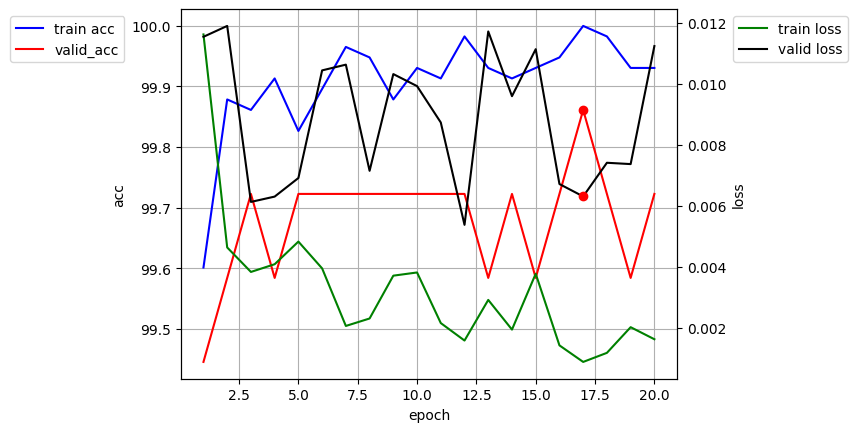

In [18]:
## Í≤∞Í≥º Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
print('best model info:\nModel extracted from epoch %d\nValid Acc=%1.f / Valid Loss=%.1f'%(best_idx, valid_acc[best_idx-36-1], valid_loss[best_idx-36-1]))
fig, ax1 = plt.subplots()

ax1.plot([n for n in range(1,len(train_acc)+1)], train_acc, 'b-', label='train acc')
ax1.plot([n for n in range(1,len(valid_acc)+1)], valid_acc, 'r-', label ='valid_acc')
plt.plot(best_idx-36, valid_acc[best_idx-36-1], 'ro')
ax1.set_xlabel('epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('acc', color='k')
ax1.tick_params('y', colors='k')
plt.legend(bbox_to_anchor=(-0.1, 1.0), loc="upper right")
plt.grid()

ax2 = ax1.twinx()
ax2.plot([n for n in range(1,len(train_loss)+1)], train_loss, 'g-', label='train loss')
ax2.plot([n for n in range(1,len(valid_loss)+1)], valid_loss, 'k-', label='valid loss')
plt.plot(best_idx-36, valid_loss[best_idx-36-1], 'ro')
ax2.set_ylabel('loss', color='k')
ax2.tick_params('y', colors='k')
plt.legend(bbox_to_anchor=(1.1, 1.0), loc="upper left")


plt.show()

## Î™®Îç∏ TEST

In [19]:
def test_and_visualize_model(model, dataloaders, phase = 'test', num_images=4):
  # phase = 'train', 'valid', 'test'

  was_training = model.training
  model.eval()

  running_loss, running_corrects, num_cnt = 0.0, 0, 0

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders[phase]):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels) # batchÏùò ÌèâÍ∑† loss Ï∂úÎ†•

      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
      num_cnt += inputs.size(0) # batch size

    test_loss = running_loss / num_cnt
    test_acc = running_corrects.double() / num_cnt
    print('test done : loss/acc : %.2f / %.1f' % (test_loss, test_acc*100))

  # ÏòàÏãú Í∑∏Î¶º Ï∂úÎ†•
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders[phase]):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(1, num_images+1):
        ax = plt.subplot(num_images//2, 2, j)
        ax.axis('off')
        ax.set_title('%s : %s -> %s' %(
          'True' if class_names[str(labels[j].cpu().numpy())] == class_names[str(preds[j].cpu().numpy())] else 'False',
          class_names[str(labels[j].cpu().numpy())],
          class_names[str(preds[j].cpu().numpy())]
        ))
        imgShow(inputs.cpu().data[j])

      if i == 0: break

  model.train(mode=was_training) # Îã§Ïãú trainÎ™®ÎìúÎ°ú Ï†ÑÌôò

test done : loss/acc : 0.02 / 99.7


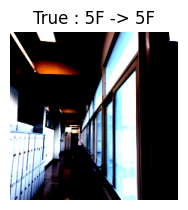

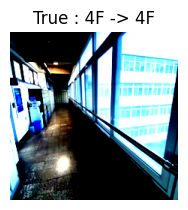

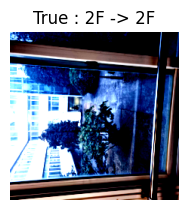

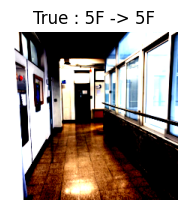

In [20]:
test_and_visualize_model(model, dataloaders, phase='test')

# Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò Î∞è CSV ÎßåÎì§Í∏∞

In [31]:
import glob
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import sys

In [32]:
data_path = './test'
image_files = sorted(glob.glob(data_path + '/*'))
csv_filename = 'answer.csv'

os_name = sys.platform
path_split = '/'
if os_name.startswith('win'):
  path_split = '\\'

In [33]:
class TestImageDataset(Dataset):
  def __init__(self, files, transform):
    super().__init__()
    self.files = files
    self.transform = transform

  def __len__(self):
    return len(self.files)

  def __getitem__(self, index):
    file = self.files[index]
    try:
        img = Image.open(file).convert('RGB')
    except Exception as e:
        print(f"Error opening image {file}: {e}")
        raise
    img = self.transform(img)

    return img, file.split(path_split)[-1]

In [34]:
test_transform = transforms.Compose([
                        transforms.Resize((224, 224)), # 224x224 ÏÇ¨Ïù¥Ï¶àÎ°ú Î≥ÄÌôò
                        transforms.ToTensor(), # ÌÖêÏÑúÌôî
                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                      ])

In [35]:
test_dataset = TestImageDataset(image_files, test_transform)

In [36]:
test_loader = DataLoader(test_dataset,
                         batch_size=params['batch_size'],
                         shuffle=False,
                         )

In [37]:
model_dict = torch.load(pt_file_name, map_location=device)

trained_model = efficientnet_b0(pretrained=True)  # pretrained=TrueÎ°ú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Í∞ÄÏ§ëÏπò Î°úÎìú
trained_model.classifier[1] = torch.nn.Linear(trained_model.classifier[1].in_features, num_classes)
trained_model.load_state_dict(model_dict['model_state_dict'])
trained_model = trained_model.to(device)

# CUDA ÌôïÏù∏
print(f"CUDA:{next(trained_model.parameters()).is_cuda}")

C:\Users\ryong\AppData\Local\Temp\ipykernel_22148\3888540806.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(pt_file_name, map_location=device)


CUDA:True


In [38]:
def test_and_make_csv(model, dataloader):
  # phase = 'train', 'valid', 'test'

  model.eval()

  answer_csv = 'id,floor\n'

  pbar_dataloaders = tqdm(dataloader,
                          desc='Making Csv',
                          ncols=70)
  with torch.no_grad():
    for inputs, filenames in pbar_dataloaders:
      inputs = inputs.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(len(preds)):
        answer_csv += f'{filenames[j].split(".")[0]},{class_names[str(preds[j].cpu().numpy())]}\n'
  pbar_dataloaders.close()

  with open(csv_filename, 'w') as file:
    file.write(answer_csv)
    print(f'{csv_filename}Í∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.')

In [39]:
test_and_make_csv(trained_model, test_loader)

Making Csv: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:53<00:00,  2.15s/it]

answer.csvÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


In [40]:
# csv ÌååÏùº ÎãµÏïà Î∂ÑÌè¨ Î≥¥Í∏∞
import csv
from collections import Counter

csv_filename = 'answer.csv'

label_counter = Counter()

with open(csv_filename, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # Ï≤´ Ï§Ñ (Ìó§Îçî) Ïä§ÌÇµ: ['id', 'floor']
    for row in reader:
        # row ÏòàÏãú: ['image001', '2F']
        if len(row) < 2:
            continue  # ÎπÑÏ†ïÏÉÅ ÌñâÏù¥ ÏûàÎã§Î©¥ Î¨¥Ïãú
        label = row[1]  # Îëê Î≤àÏß∏ Ïó¥Ïù¥ floor(ÎùºÎ≤®)
        label_counter[label] += 1

print("=== Test Set Label Distribution ===")
for label, count in label_counter.items():
    print(f"{label} : {count} images")

=== Test Set Label Distribution ===
4F : 199 images
3F : 201 images
2F : 200 images
5F : 200 images
